<a href="https://colab.research.google.com/github/tranduytruong12/Pytorch_fundamentals/blob/main/Pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [3]:
tensor1 = torch.rand(2,)
tensor1.shape

torch.Size([2])

## Initialize tensor

In [ ]:
# Create a 2d zeros tensor
tensor_2d0 = torch.zeros(2,2)
tensor_2d0

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# Create a random 2d tensor
tensor_2d = torch.rand(2,3)
tensor_2d

tensor([[0.4868, 0.3586, 0.1047],
        [0.9341, 0.4442, 0.5780]])

In [ ]:
# Copy a numpy array to tensor
np1 = np.array([1,2,3,4])
tensor = torch.tensor(np1)
tensor

tensor([1, 2, 3, 4])

In [ ]:
# Check data type
tensor.dtype

torch.int64

In [ ]:
# Create a tensor with range
tensor_1_10 = torch.arange(11)
tensor_1_10

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## shaping and slicing with tensor

In [ ]:
my_tensor = torch.rand(2,5)

In [ ]:
my_tensor = my_tensor.reshape(5,2)
my_tensor

tensor([[0.6956, 0.7114],
        [0.0624, 0.4663],
        [0.2871, 0.3475],
        [0.1574, 0.5377],
        [0.9361, 0.6529]])

In [ ]:
my_tensor = my_tensor.reshape(10,1)
my_tensor

In [ ]:
my_tensor = my_tensor.reshape(1,10)

In [ ]:
my_tensor.reshape(2,5,1)
my_tensor

tensor([[[0.6956],
         [0.7114],
         [0.0624],
         [0.4663],
         [0.2871]],

        [[0.3475],
         [0.1574],
         [0.5377],
         [0.9361],
         [0.6529]]])

In [ ]:
my_tensor.reshape(1,-1)

tensor([[0.6956, 0.7114, 0.0624, 0.4663, 0.2871, 0.3475, 0.1574, 0.5377, 0.9361,
         0.6529]])

In [ ]:
my_tensor.reshape(-1,2)

tensor([[0.6956, 0.7114],
        [0.0624, 0.4663],
        [0.2871, 0.3475],
        [0.1574, 0.5377],
        [0.9361, 0.6529]])

In [ ]:
tensor_1 = torch.rand(16)

In [ ]:
tensor_2 = tensor_1.reshape(4,4)
tensor_2

tensor([[0.4838, 0.6710, 0.9355, 0.1566],
        [0.3732, 0.2444, 0.9534, 0.7477],
        [0.9768, 0.0132, 0.3452, 0.6491],
        [0.7174, 0.1061, 0.6749, 0.9225]])

In [ ]:
tensor_3 = tensor_1.reshape(2,4,-1)
tensor_3

tensor([[[0.4838, 0.6710],
         [0.9355, 0.1566],
         [0.3732, 0.2444],
         [0.9534, 0.7477]],

        [[0.9768, 0.0132],
         [0.3452, 0.6491],
         [0.7174, 0.1061],
         [0.6749, 0.9225]]])

In [ ]:
tensor_2[:,1]

tensor([0.6710, 0.2444, 0.0132, 0.1061])

In [ ]:
tensor_2[:,1:3]

tensor([[0.6710, 0.9355],
        [0.2444, 0.9534],
        [0.0132, 0.3452],
        [0.1061, 0.6749]])

In [ ]:
tensor_3[:,:,-1]

tensor([[0.6710, 0.1566, 0.2444, 0.7477],
        [0.0132, 0.6491, 0.1061, 0.9225]])

In [ ]:
tensor_3[:,1,-1].shape

torch.Size([2])

## Math operation

## Neural network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a Model
class Model(nn.Module):
  def __init__(self, in_f = 4, h1 = 8, h2 = 9, out_f = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_f, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2,out_f)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [ ]:
# For consistency result
torch.manual_seed(42)

model = Model()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = df.drop('species', axis = 1)
y = df['species']

In [ ]:
y = y.replace('setosa', 0)
y = y.replace('virginica', 1)
y = y.replace('versicolor', 2)

<ipython-input-29-f45f0c9f0dad>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace('versicolor', 2)


In [ ]:
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
y_train

tensor([2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0,
        0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1,
        0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2,
        1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
        0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1])

In [ ]:
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
epochs =  10000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  # Measure loss
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch {i}: loss is {loss}.')

  # Back prob
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0: loss is 0.04529167711734772.
Epoch 10: loss is 0.044632453471422195.
Epoch 20: loss is 0.04399566724896431.
Epoch 30: loss is 0.0433804988861084.
Epoch 40: loss is 0.04278559982776642.
Epoch 50: loss is 0.04220999404788017.
Epoch 60: loss is 0.04165264591574669.
Epoch 70: loss is 0.04111260548233986.
Epoch 80: loss is 0.040589071810245514.
Epoch 90: loss is 0.04008125141263008.
Epoch 100: loss is 0.03958837687969208.
Epoch 110: loss is 0.03910980001091957.
Epoch 120: loss is 0.03864491730928421.
Epoch 130: loss is 0.038193073123693466.
Epoch 140: loss is 0.03775374963879585.
Epoch 150: loss is 0.0373263917863369.
Epoch 160: loss is 0.036911290138959885.
Epoch 170: loss is 0.03650782257318497.
Epoch 180: loss is 0.0361153706908226.
Epoch 190: loss is 0.0357331857085228.
Epoch 200: loss is 0.03536093607544899.
Epoch 210: loss is 0.03499802574515343.
Epoch 220: loss is 0.034644100815057755.
Epoch 230: loss is 0.034298766404390335.
Epoch 240: loss is 0.0339617095887661.
Epoch 250:

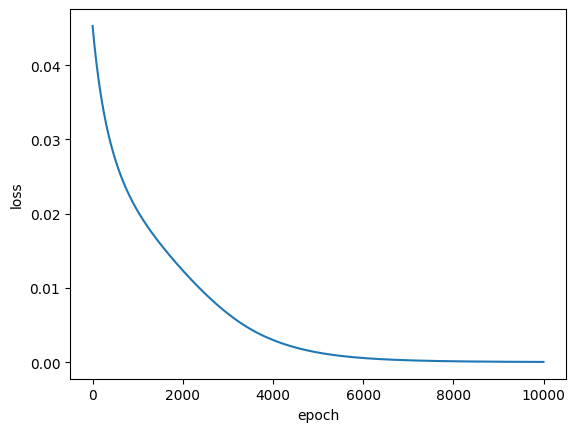

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# Evaluate on test set
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.9087)

In [ ]:
with torch.no_grad():
  correct = 0
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)}, {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
    else: print('Wrong here!')
  print(correct)

1.) tensor([-10.9115,  23.0720,  -7.2917]), 1
2.) tensor([-24.0103,  74.9278, -44.5817]), 1
3.) tensor([-27.5630,  87.1691, -52.5951]), 1
4.) tensor([ -0.7538, -10.4100,  15.1408]), 2
5.) tensor([-19.7296,  56.2723, -30.3649]), 1
6.) tensor([  1.4248, -14.4732,  16.5479]), 2
7.) tensor([-11.2324,  22.8591,  -6.4261]), 1
8.) tensor([-1.1992, -9.7486, 15.0830]), 2
9.) tensor([-15.3350,  38.6554, -17.5691]), 1
10.) tensor([-26.4565,  83.3668, -50.0588]), 1
11.) tensor([-8.8123, 12.3527,  1.6082]), 1
12.) tensor([ 23.9534, -33.5865,   6.8763]), 0
13.) tensor([ 21.6217, -30.2489,   6.0875]), 0
14.) tensor([  2.8353, -15.5634,  15.3675]), 2
15.) tensor([ 20.2195, -31.3681,   9.3834]), 0
16.) tensor([-5.1915, -1.0154, 10.8766]), 1
Wrong here!
17.) tensor([ 21.8502, -31.3880,   7.1442]), 0
18.) tensor([-9.2305, 14.8147, -0.5534]), 2
Wrong here!
19.) tensor([ 23.3887, -32.4180,   6.2508]), 0
20.) tensor([ 18.8649, -27.7598,   6.9121]), 0
21.) tensor([  2.6402, -15.8632,  16.1425]), 2
22.) tenso

In [ ]:
# Predict new data
import numpy as np
new_data = np.random.rand(1,4)
new_data = torch.FloatTensor(new_data)
with torch.no_grad():
  print(model(new_data).argmax().item())

2


## CNN

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [30]:
transform = transforms.ToTensor() # images to number_of_images, Height, Weight, Channel
# Train Data
train_data = datasets.MNIST(root ='cnn_data', train = True, download = True, transform = transform)

In [31]:
test_data = datasets.MNIST(root ='cnn_data', train = False, download = True, transform = transforms)

In [10]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: <module 'torchvision.transforms' from '/usr/local/lib/python3.11/dist-packages/torchvision/transforms/__init__.py'>

In [11]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: <module 'torchvision.transforms' from '/usr/local/lib/python3.11/dist-packages/torchvision/transforms/__init__.py'>

In [32]:
train_loader = DataLoader(train_data, batch_size = 10)
test_loader = DataLoader(test_data, batch_size = 10)


In [42]:
iter(train_loader)

Image batch shape: torch.Size([10, 1, 28, 28])
Label batch shape: torch.Size([10])


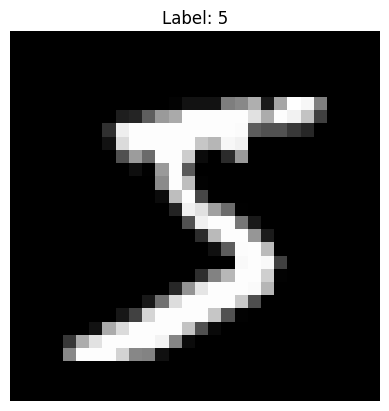

In [33]:
# View one batch of images and labels
images, labels = next(iter(train_loader))

# Check shape
print("Image batch shape:", images.shape)  # e.g., torch.Size([10, 1, 28, 28])
print("Label batch shape:", labels.shape)

# Show the first image in the batch
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"Label: {labels[0].item()}")
plt.axis('off')
plt.show()

In [16]:
# Model
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 60)
    self.fc3 = nn.Linear(60, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    X = X.reshape(-1, 5*5*16) # Mean we get X.shape = (n_number data ,16 feature 5x5 for each data)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim = 1)

In [51]:
torch.manual_seed(42)
epochs = 2
losses = []
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
)

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [53]:
import time
start_time = time.time()

for i in range(epochs):

  for b, (X_train, y_train) in enumerate(train_loader):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if b % 500 == 0:
      print(loss)
  print(i)
end_time = time.time()
total = end_time - start_time
print(f"Time consumed: {total/60} minutes.")

tensor(2.3763, grad_fn=<NllLossBackward0>)
tensor(0.6363, grad_fn=<NllLossBackward0>)
tensor(0.0711, grad_fn=<NllLossBackward0>)
tensor(0.0087, grad_fn=<NllLossBackward0>)
tensor(0.3040, grad_fn=<NllLossBackward0>)
tensor(0.0211, grad_fn=<NllLossBackward0>)
tensor(0.0630, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.0905, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.0169, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
0
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0073, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0585, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0556, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.2101, grad_fn=<NllLossBackward0>)
tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.